# Pseudo-random number generators


<img src="http://dilbert.com/strip/2001-10-25">
<img src="http://assets.amuniversal.com/321a39e06d6401301d80001dd8b71c47">

## Pseudo-random number generators

A computer is a deterministic system that executes a series of instructions (program) in a completely predictable fashion.  In the absence of some external source of real randomness (eg. a thermal ``noise'' diode) we have to settle for a pseudo-random number generator that uses a deterministic algorithm to produce a sequence of apparently random values.  All PNRGs consist of some function $f$ that operates on some number $x_i$ to produce a new value $x_{i+1}$

 $$ x_{i+1} = f(x_i;a_1,a_2,\ldots a_n) $$

where $a_n$ are internal parameters specific to each implementation.

A useful class of PRNGs are based on multiplicative linear congruential generators
 $$  x_{i+1} = a x_i \;mod\, m $$
which uses integer multiplication and modulo arithmetic to produce numbers in the range from 1 to $m-1$.

For example

 $$  x_{i+1} = 6 x_i \;mod\, 13 $$

starting with a seed of $1$ produces the sequence

 $$\ldots 1,6,10,8,9,2,12,7,3,5,4,11,1 \ldots$$
 
while starting with a seed of $2$ produces the sequence

 $$\ldots 2,12,7,3,5,4,11,1,6,10,8,9,2 \ldots$$
 
In general, the result will be a circular list of a permutation of the integers between $1$ and $m-1$.

The choice for multiplicative factor and modulus is critical, as most values produce non-random sequences.
One good pair of parameters found by Park and Miller
 $$ x_{i+1} = 7^5 x_i \;mod\, (2^{31} - 1) = 16807 x_i \;mod\, 2147483647 $$
produces a complete sequence of 32 bit random numbers.

\emph{Note:}``state-of-the-art'' PRNGs may be based on more sophisticated algorithms, but they all produce some kind of circular permuted list.  This is equivalent to drawing cards from a shuffled deck, as the next card is unpredictable but not random.



## A terrible example

https://en.wikipedia.org/wiki/RANDU

RANDU is a linear congruential pseudorandom number generator of the Park–Miller type, which has been used since the 1960s. It is defined by the recurrence:

 $$ V_{j+1} = 65539\cdot V_j\, \bmod\, 2^{31} $$
 
with the initial seed number $V_0$ as an odd number. It generates pseudorandom integers $V_{j}$ which are uniformly distributed in the interval [1, $2^{31}$ − 1], but in practical applications are often mapped into pseudorandom rationals $X_j$ in the interval (0, 1), by the formula:

 $$ X_j = \frac{V_{j}}{2^{31}} $$
 
IBM's RANDU is widely considered to be one of the most ill-conceived random number generators ever designed.

The reason for choosing these particular values is that with a 32-bit-integer word size, the arithmetic of mod 231 and 65539 (i.e., 2^{16}+3) calculations could be done quickly, using special features of some computer hardware.

In [10]:
abcd=[13] ; modt=2**31  ;  nn=500000
print(abcd)

[13]


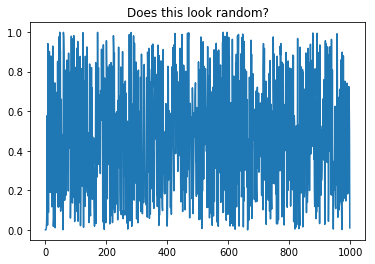

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
V = [13] ; modt=2**31  ;  nn=500000
for i in range(nn-1): V.append( 65539*V[-1] % modt )
x = np.array(V) / 2.0**31

plt.plot(x[0:999])
plt.title('Does this look random?')

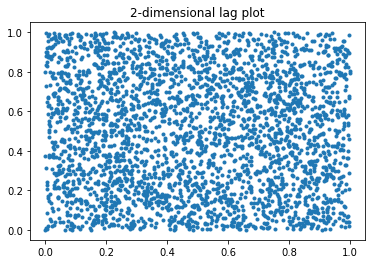

In [2]:
# If successive numbers were not actually independent then we might expect 
# to see some patterns emerging when we plot one sample as x and the next
# sample as y.
#
xx, yy = x[0:6000].reshape(-1,2).T
plt.plot( xx,yy, '.')
plt.title('2-dimensional lag plot')
#
# Humans are very good at detecting patterns, even when there 
# isn't actually anything there.  However, I would say that 
# there is structure in this plot.  A quantitative analysis 
# might be done using the joint probability.

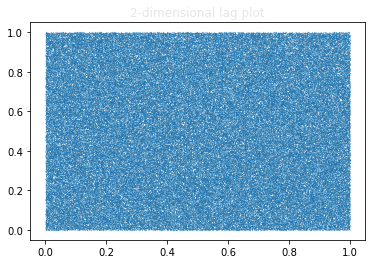

In [3]:
# Tried plotting more points, but that didn't help.
#
xx, yy = x.reshape(-1,2).T
plt.plot( xx,yy, '.', ms=0.2)
plt.title('2-dimensional lag plot', alpha=0.1)

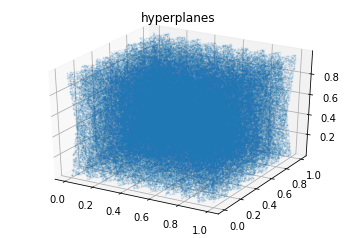

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#xx, yy, zz = x[0:6000].reshape(3,-1)
xx, yy, zz = x[0:nn-3:3], x[1:nn-2:3], x[2:nn-1:3]

plt.plot( xx,yy,zz, '.', ms=1.5, alpha=0.1)
plt.title('hyperplanes')

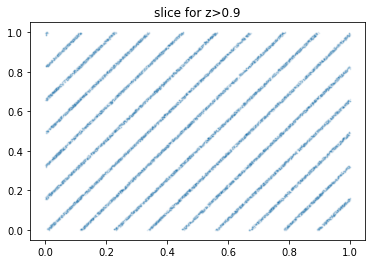

In [5]:
plt.plot( xx[zz>0.9], yy[zz>0.9], '.', ms=1.5, alpha=0.1)
plt.title('slice for z>0.9')

Extending this approach to three dimensions turns out to be very informative.  Rather than being uniformly distributed around the volume, it turns out that all of the points occur on a small number of planes.  This will drastically reduce the randomness, as knowing one value will let us make predictions about others.

### Optional: try changing the PRNG parameters and see what happens to the hyperplanes.

# Bitwise
The paper by Park & Miller mentions a classic PRNG that was commonly used by UNIX operating systems, and claims that
"the low bits of the numbers generated are not very random".

We can test this claim by defining a function as given in equation 14.

In [4]:
def unix_rand(seed=None):
    
    unix_rand.seed = unix_rand.seed if seed is None else seed
    if unix_rand.seed is None:
        unix_rand.seed = 0
    
    multval, addval, maxval = 1103515245, 12345, 2**31
    unix_rand.seed = (multval * unix_rand.seed + addval) % maxval
    
    return unix_rand.seed

print( unix_rand(0) )
print( unix_rand() )
print( unix_rand() )

12345
1406932606
654583775


In [5]:
import numpy as np

# generate a short sequence of pseudo-random numbers
#
z = [unix_rand(seed=0)]
for i in range(5):
    z.append(unix_rand() )

# turn the list into a numpy array
#
z = np.array(z)    

In [6]:
setbit = 4
bitmask = 2**setbit
print('setbit=', setbit, 'bitmask=', bitmask)

# look at the sequence
print('\n', z )

# "mask" the bit with a binary "and"
print('\n', z & bitmask )

# is the bit set?  (True or False)
print('\n', (z & bitmask) != 0)

# is the bit set?  (1 or 0)
print('\n',  (z & bitmask) // bitmask)

setbit= 4 bitmask= 16

 [     12345 1406932606  654583775 1449466924  229283573 1109335178]

 [16 16 16  0 16  0]

 [ True  True  True False  True False]

 [1 1 1 0 1 0]


## Question- random bits?

Write a function that takes an integer sequence and determines whether a specific bit is set for each value  ie.

function call:

     isbitset( sequence=[0,2,1,4,7], setbit=1 )
     

result: 

     [False, True, False, False, True]
     
Use this function to examine the output from the unix_rand generator.  Then examine the output from the numpy.random generator.  Compare and discuss.     

Optional: Carry out a quantitative analysis using "mutual information".

## Generating a random variate with desired PDF
In numerical simulations of statistical processes (so-called "Monte Carlo" calculations) we often need to find some function y(x) which will map a random variate x with a given probability distribution function p(x) into a variate which has some other desired
PDF q(y).  One way to do this starts with the relation

 $$ p(x) dx = q(y) dy $$

and derives the following equation
 
 $$  \int\limits_{-\infty}^x p(x') dx' = \int\limits_{-\infty}^y q(y') dy' $$
  
where $p(x)$ and $q(y)$ are both normalized to unit area.  

If $p(x)$ is the unit distribution (aka rectangular) then the left-hand side is simply $x$.

Primary cosmic rays arrive at the upper atmosphere with a wide range of energies.
The energy spectrum follows a power-law distribution for $E>0$

  $$ S(E) = a E^{-b} $$
  
where $a>0$ and $b>2$.  Starting with only a uniform random number generator, 
we may wish to generate cosmic rays with a certain power-law distribution.

## Optional: Derive an equation for E(x), generate 10e5 random variates, plot a histogram, and overplot the expected distribution.

In [9]:
'b04'.format(132)

'b04'

In [2]:
tobinary(23)

NameError: name 'tobinary' is not defined